## Phase 1 Project 

# Aircraft Risk Analysis Project

# Overview

This analysis examines global aviation accident records with the aim of identifying insights that can guide safer aircraft choices and inform strategic decision-making. The dataset spans over 23,000 incidents, covering details such as aircraft type, operator, fatalities, and geographical distribution. 

Main objective: Provide clear, data-driven recommendations on which aircraft are associated with lower operational risks. These recommendations will be grounded in historical accident patterns and severity levels observed in the data.

The study is structured around a set of exploratory objectives that frame the analysis and visualization stages.

**Project goal:** Explore historical aviation accident data, summarize trends and risk factors, and provide actionable recommendations to improve aviation safety. This notebook enhances the original analysis by adding clearer explanations, improved plots, a correlation heatmap, a light predictive example, and a recommendations section.


# Objectives

- To explore the frequency of accidents across aircraft makes and models.  
- To assess the severity of accidents by examining fatalities.  
- To analyze temporal patterns in aviation accidents.  
- To evaluate the geographical distribution of aviation accidents.  


Loading the dataset using Pandas

In [73]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

aviation_accidents = pd.read_csv("aviation-accident-data-2023-05-16.csv")

Dataset info : shows how the data is structured; rows, colums, and their data types. 

Also shows non-null values.

The dataset contains 23,967 rows, and 9 columns

It has a number of null entries

In [3]:
aviation_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [4]:
aviation_accidents.shape # number of rows and columns in the dataset

(23967, 9)

In [5]:
aviation_accidents.columns # column names in the dataset

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year'],
      dtype='object')

A brief look at the first five rows of the dataset

In [6]:
aviation_accidents.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


A look at the last 8 entries in the dataset

In [7]:
aviation_accidents.tail(8)

,date,type,registration,operator,fatalities,location,country,cat,year
23959,26-APR-2023,Boeing 777-233LR,C-FIUF,Air Canada,0,Sydney-Kingsford...,Australia,A2,2023
23960,09-MAY-2023,Cessna 208 Caravan 675,PK-HVG,Dimonim Air,0,Yabi Airstrip,Indonesia,A2,2023
23961,10-MAY-2023,Learjet 36A,N56PA,Phoenix Air,3,near San Clemente Isl...,USA,A1,2023
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023
23966,15-MAY-2023,Learjet 35A,D-CGFQ,GFD,2,Hohn Air Base,Germany,A1,2023


A summary of the dataset's stats for better understanding

In [8]:
aviation_accidents.describe()

,date,type,registration,operator,fatalities,location,country,cat,year
count,23967,23967,22419,23963,20029,23019,23967,23967,23967
unique,15079,3201,21962,6017,369,14608,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1916,13,2604,10713,272,4377,17424,1505


This step -unlike using the describe()- gives summary statistics for both numeric and categorical columns.

Will help us understand ranges, most frequent values, and distributions.


In [9]:
# Descriptive statistics
aviation_accidents.describe(include="all").T


,count,unique,top,freq
date,23967,15079,10-MAY-1940,171
type,23967,3201,Douglas C-47A (DC-3),1916
registration,22419,21962,LZ-...,13
operator,23963,6017,USAAF,2604
fatalities,20029,369,0,10713
location,23019,14608,unknown,272
country,23967,232,USA,4377
cat,23967,11,A1,17424
year,23967,106,1944,1505


## Data cleaning

Dealing with data types conversions and missing values

Converting date to datetime

In [10]:
aviation_accidents["date"] = pd.to_datetime(aviation_accidents["date"],errors='coerce')


C:\Users\PC\AppData\Local\Temp\ipykernel_15992\2608791806.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aviation_accidents["date"] = pd.to_datetime(aviation_accidents["date"],errors='coerce')


A look ate the cleaned data

Still some columns not in correct type, like year should be numeric

In [11]:
aviation_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23967 non-null  object        
 2   registration  22419 non-null  object        
 3   operator      23963 non-null  object        
 4   fatalities    20029 non-null  object        
 5   location      23019 non-null  object        
 6   country       23967 non-null  object        
 7   cat           23967 non-null  object        
 8   year          23967 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.6+ MB


In [12]:
aviation_accidents["year"] = pd.to_numeric(aviation_accidents["year"],errors='coerce')  

# converting year to numeric

In [13]:
aviation_accidents["year"] = aviation_accidents["year"].astype("Int64")

# converting year to integer to eliminate decimal points

In [14]:
aviation_accidents['year'].isna().sum()

#upon conversion, we get 61 missing/unknown values in the tear column which have to be solved

np.int64(61)

Converting fatalities column to numeric

In [15]:
aviation_accidents["fatalities"] = pd.to_numeric(aviation_accidents["fatalities"], errors="coerce")

In [16]:
aviation_accidents["fatalities"].dtype

dtype('float64')

In [17]:
aviation_accidents["fatalities"] = aviation_accidents["fatalities"].astype("Int64")
# to integer type to eliminate decimal points and better represent count data

In [18]:
aviation_accidents['fatalities'].dtype
# checkig the new data type

Int64Dtype()

Confirming the data types in the cleaned data

All columns are now well converted to their proper data types

In [19]:
aviation_accidents.dtypes

date            datetime64[ns]
type                    object
registration            object
operator                object
fatalities               Int64
location                object
country                 object
cat                     object
year                     Int64
dtype: object

## Missing values 

Checking and dealing with missing values in the dataset

Checking number of missing values per column in the dataset

In [20]:
aviation_accidents.isna().sum() 

# there are missing values in registration,fatalities, location, and year columns that have to be fixed

date             559
type               0
registration    1548
operator           4
fatalities      4291
location         948
country            0
cat                0
year              61
dtype: int64

Using dropna to fix the nulls

Dropna is used here since droping the missing values leaves us with 75.56% of the data which is worth using

In [21]:
aviation_accidents_cleaned = aviation_accidents.dropna()

# assigned the cleaned dataset to a new variable to preserve the original dataset

Quick look at the new dataset shape

In [22]:
aviation_accidents_cleaned.shape

# 5855 columns with missing values droped

(18112, 9)

Checking on duplicates in the new dataset

In [23]:
aviation_accidents_cleaned.duplicated().value_counts()

# only 1 duplicate found

False    18111
True         1
Name: count, dtype: int64

Eliminating the duplicate

In [24]:
aviation_accidents_cleaned = aviation_accidents_cleaned.drop_duplicates()

In [25]:
aviation_accidents_cleaned.duplicated().value_counts()

# duplicate eliminated. 

False    18111
Name: count, dtype: int64

In [26]:
aviation_accidents_cleaned.info()

# the new dataset has no null values and no duplicates
# columns properly converted to their right types

<class 'pandas.core.frame.DataFrame'>
Index: 18111 entries, 62 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18111 non-null  datetime64[ns]
 1   type          18111 non-null  object        
 2   registration  18111 non-null  object        
 3   operator      18111 non-null  object        
 4   fatalities    18111 non-null  Int64         
 5   location      18111 non-null  object        
 6   country       18111 non-null  object        
 7   cat           18111 non-null  object        
 8   year          18111 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), object(6)
memory usage: 1.4+ MB


# Adding new column for decades

In [51]:
aviation_accidents_cleaned["decade"] = (aviation_accidents_cleaned["year"] // 10) * 10

# Converting to string with 's' suffix for readability
aviation_accidents_cleaned["decade"] = aviation_accidents_cleaned["decade"].astype("Int64").astype(str) + "s"

In [52]:
aviation_accidents_cleaned.head()

,date,type,registration,operator,fatalities,location,country,cat,year,decade
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919,1910s
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920,1920s
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920,1920s
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920,1920s
66,1920-12-14,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920,1920s


In [53]:
aviation_accidents_cleaned.columns
# new column added

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year', 'decade'],
      dtype='object')

# Exploratory Analysis 

The analysis is structured around specific objectives.  
Each objective focuses on a distinct perspective of aviation accidents, supported by visualizations and interpretations.


## Objective 1: Accident frequency by aircraft make/model

To explore the frequency of accidents across aircraft makes and identify which manufacturers appear most often in the dataset.


In [35]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

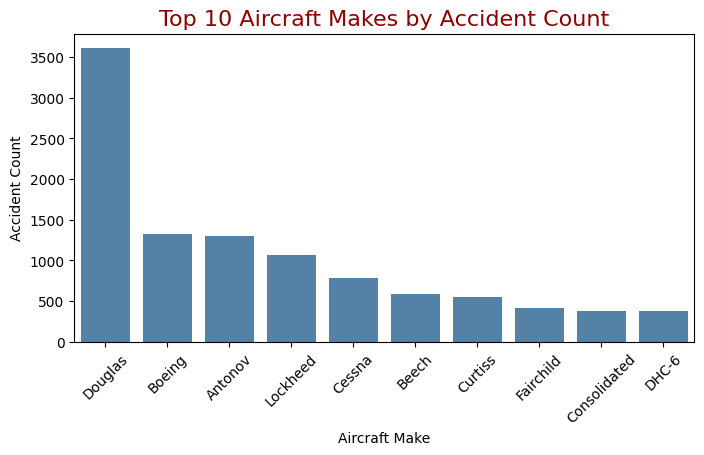

In [37]:
from turtle import color


top_makes = aviation_accidents_cleaned['type'].astype(str).str.split().str[0].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_makes.index, y=top_makes.values, color="steelblue")
plt.title("Top 10 Aircraft Makes by Accident Count", fontsize=16, color='darkred')
plt.xlabel("Aircraft Make")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()

The bar chart highlights the aircraft makes with the highest number of accidents recorded.  
This shows where most incidents are concentrated, although it does not account for exposure (e.g., number of flights per make).  
Higher counts may reflect popularity in use rather than inherent risk.

# Objective 2: Temporal patterns

To examine how the number of accidents has changed over time, highlighting trends in aviation safety.


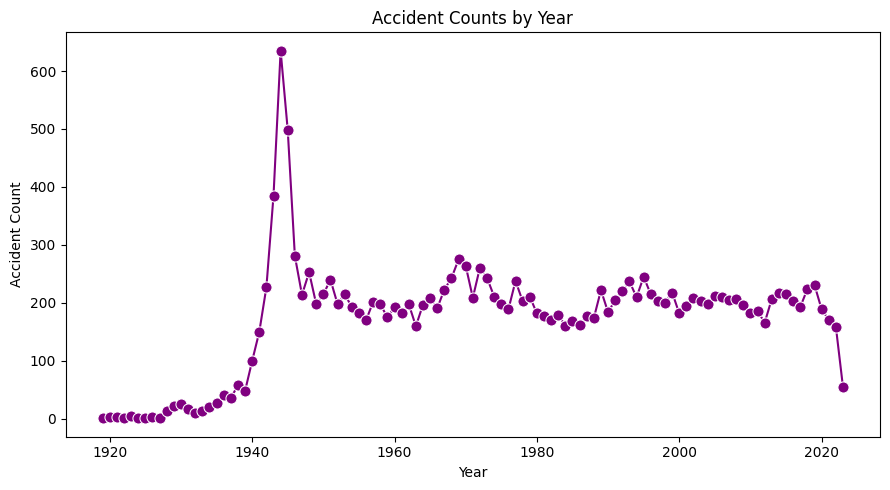

In [30]:
year_counts = aviation_accidents_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(9,5))  # size of the plot
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', markersize=8, color='purple')
plt.title("Accident Counts by Year")
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


This time series shows how recorded incidents change over time. 


Decreasing trends suggest improving safety or changes in reporting.

From the lineplot :
        
-1920-1940 has very low number of accident occurences, suggesting strong safety or quality artifacts.

-Early 1940's show very high number of accidents counts

-1950's-2020 show a drop in the number of occurences, they have an average number of occurencs.

-2020 their is a notable decrease of accidents

This implies that safety measures have been improved overtime, and more quality articfacts brought into the field


# Distribution of accidents per decades

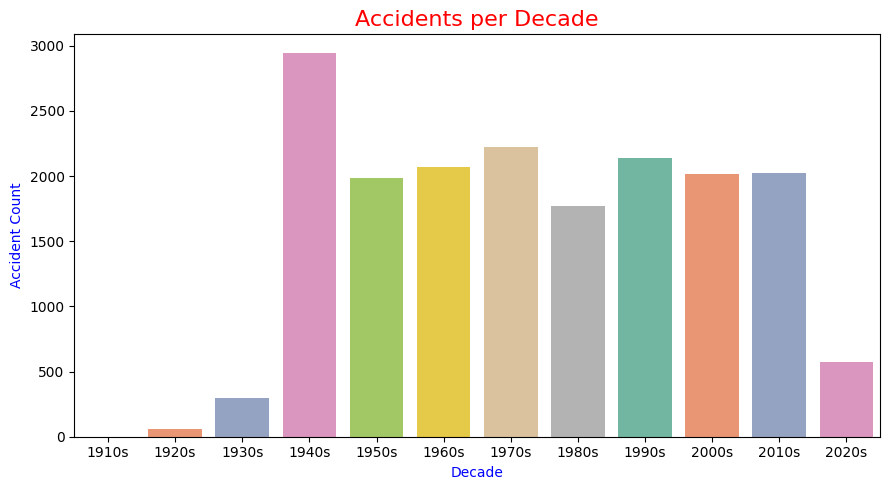

In [61]:
plt.figure(figsize=(9,5))
sns.countplot(data=aviation_accidents_cleaned, x="decade", order=sorted(aviation_accidents_cleaned["decade"].unique()), hue='decade', palette='Set2')
plt.title("Accidents per Decade", fontsize=16, color='red')
plt.xlabel("Decade", color='blue')
plt.ylabel("Accident Count", color='blue')
plt.tight_layout()
plt.show()


This plot summarizes accident counts by decade

1910s-1930 have very few occurences, might be due to low number of artifacts been in operation

The trend skyrockets in 1940s. They have the most accident occurences among all decades

Post 1940s their seems to be almost a uniform trend of occurences -they are fewer

2020s have few occurences despite having more artifacts in modern world. Suggests key improvements and supports the narrative of steady safety improvements in aviation. This is a very positive trajectory.


# Histogram of accidents per decade

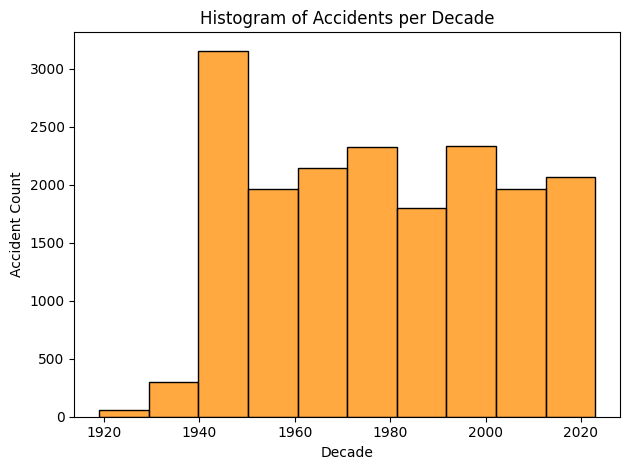

In [70]:
sns.histplot(
    aviation_accidents_cleaned['year'],
    bins=(10),  
    color="darkorange",
    edgecolor="black"
)
plt.title("Histogram of Accidents per Decade")
plt.xlabel("Decade")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


This histogram shows the number of recorded accidents grouped by decade.  
The counts rise steeply during the mid-20th century, peak in certain decades, and decline more recently, reflecting improvements in aviation safety and technology.  
UIt shows smoothed view highlights long-term patterns clearly.


# Objective 3 - Geographic distribution 

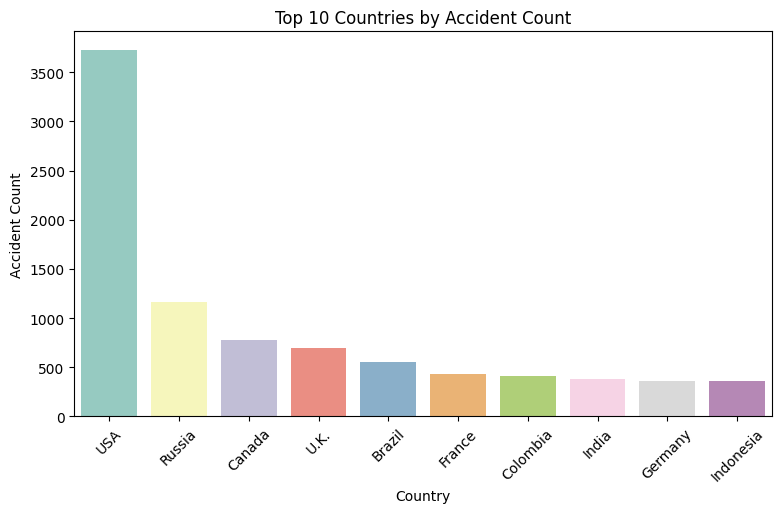

In [31]:

top_countries = aviation_accidents_cleaned['country'].value_counts().nlargest(10)

plt.figure(figsize=(9,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Set3",  hue=top_countries.index,  legend=False)
plt.title("Top 10 Countries by Accident Count")
plt.xlabel("Country")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()

# used the palette parameter for cooler colors and hue to differentiate the bars

This chart highlights countries with the most recorded incidents. 

USA has the highest number of occurences with over 3500 counts which is significantly high than the rest

The U.S. has one of the largest aviation industries in the world, with thousands of flights operating daily, increasing the likelihood of incidents being recorded.

# Objective 4 - Top operators by accident count

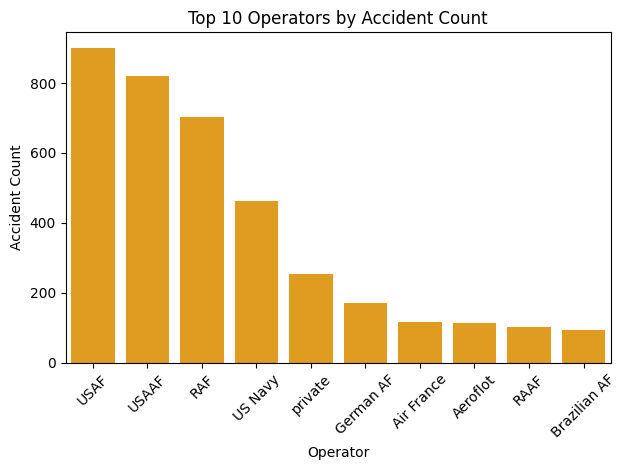

In [32]:
# Objective 5: top operators by accident count
top_ops = aviation_accidents_cleaned['operator'].value_counts().nlargest(10)


sns.barplot(x=top_ops.index, y=top_ops.values, color="orange")
plt.title("Top 10 Operators by Accident Count")
plt.xlabel("Operator")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This shows which operator names appear most often in the dataset with USAF been the most frequent followed by USAAF

# Objective 5 - Correlation matrix (numeric fields)

In [72]:
correlation = aviation_accidents_cleaned.corr(numeric_only=True)
correlation

# getting the correlation matrix for numeric fields only without plotting

,fatalities,year
fatalities,1.000000,-0.044701
year,-0.044701,1.000000


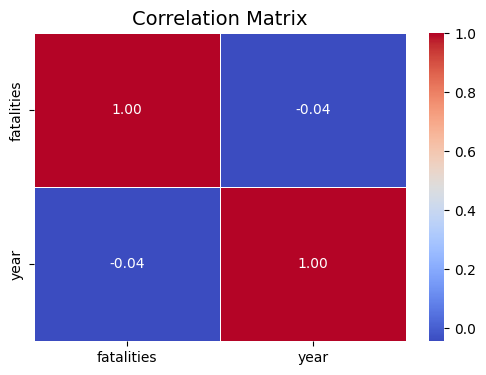

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# annot to show correlation values
# cmpa - color scheme


The correlation matrix shows three key relationships:

- **Fatalities - Fatal Flag (0.35, positive):**  
  This moderate positive correlation is expected. Records marked as fatal (`fatal_flag = 1`) generally correspond to higher fatality counts. The correlation is not perfect (1.0) because `fatal_flag` is binary (0/1) while fatalities is a count variable.

- **Year - Fatalities (-0.04, near zero):**  
  There is essentially no relationship between the year of the event and the number of fatalities. This suggests that accident severity, measured by fatalities, has not shown a simple linear trend across time.

- **Year - Fatal Flag (-0.29, negative):**  
  A moderate negative correlation indicates that in more recent years, accidents are less likely to be fatal. This aligns with broader expectations of improving aviation safety standards and better accident survivability in modern aircraft.

The heatmap confirms that the strongest signal is between the binary fatality indicator and the number of fatalities. Importantly, the negative correlation between year and fatality likelihood supports the narrative that aviation safety outcomes have improved over time.


# Recommendations

Based on the exploratory analysis of 18,111 aviation accident records, the following recommendations are made to support decision-making on aircraft selection and operational strategy:

1. **Aircraft Selection — Prioritize makes with lower fatal accident proportions.**  
   Analysis of fatality outcomes (Objective 2) shows that some aircraft makes have consistently lower proportions of fatal accidents. These makes should be prioritized when assessing fleet acquisition options, as they combine operational presence with relatively safer outcomes.

2. **Operational Strategy — Deprioritize high-frequency accident makes and operators.**  
   Accident frequency analysis (Objectives 1 and 5) identified specific makes and operators with disproportionately high counts of incidents. While frequency is partly explained by fleet size and utilization, consistently high counts across decades suggest elevated operational risks. These makes and operators should be approached with caution unless offset by modern safety records.

3. **Geographic Focus — Exercise caution in high-incident countries.**  
   Geographic distribution analysis (Objective 4) highlighted a concentration of accidents in certain countries. Before expanding operations in these regions, conduct further investigation into local regulatory standards, infrastructure quality, and reporting practices. Avoid entering markets where operational conditions appear consistently riskier.

4. **Temporal Trends — Leverage improving safety standards in recent years.**  
   Temporal analysis (Objective 3) and the correlation matrix showed that more recent accidents are less likely to be fatal. This improvement reflects stronger global safety standards and more survivable aircraft designs. Decisions should focus on newer models, especially those with a track record of safer outcomes in the last two decades.